In [43]:
from DSClustering import DSClustering
from sklearn.datasets import load_wine, load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import pandas as pd

In [44]:
X = pd.read_csv("../clustering/data/Hepta_Data.csv")
""" X = X.drop(columns=['row.names', "chd"])
print(X.head())
#dumificar columna famhist
X['famhist'] = X['famhist'].map({'Present': 1, 'Absent': 0}) """
n_clusters = 7
kmeans = KMeans(n_clusters= n_clusters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
clustering = DSClustering(X, n_clusters=n_clusters, clusters_algorithms=[kmeans, agglomerative, spectral])
clustering.compute_clusters()
clustering.compare_clusters()
clustering.normalize_clusters()
print("Normalized Clusters:")
clustering.compare_clusters()

Contingency Table between 'KMeans' and 'AgglomerativeClustering':
AgglomerativeClustering   0   1   2   3   4   5   6
KMeans                                             
0                         0  30   0   0   0   0   0
1                         0   0  30   0   0   0   0
2                         0   0   0  18   0   0   0
3                        30   0   0   0   0   0  32
4                         0   0   0   0   0  30   0
5                         0   0   0   0  30   0   0
6                         0   0   0  12   0   0   0

Contingency Table between 'KMeans' and 'SpectralClustering':
SpectralClustering   0   1   2   3   4   5   6
KMeans                                        
0                   30   0   0   0   0   0   0
1                    0  30   0   0   0   0   0
2                    0   0   0  18   0   0   0
3                    0   0  35   0   0  27   0
4                   30   0   0   0   0   0   0
5                    1   0   0   0  15   0  14
6                    0   0  

/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [45]:
labels = clustering.fit_dsc(threshold=0.5)

Number of elements in each cluster:
Cluster 0: 121 elements
Cluster 1: 90 elements
Cluster 2: 78 elements
Cluster 3: 129 elements
Cluster 4: 87 elements
Cluster 5: 75 elements
Cluster 6: 56 elements
Optimization started
Processing epoch	57	0.0404	
Training time: 6.41s, epochs: 57

Least training loss reached: 0.041


Most important rules for class 0

	[0.589] R9: -1.132 < X3 < -0.036
			0: 0.346	1: 0.242	2: 0.000	3: 0.082	4: 0.214	5: 0.105	6: 0.011	Unc: 0.000

	[0.583] R4: X2 < -1.090
			0: 0.583	1: 0.000	2: 0.000	3: 0.000	4: 0.000	5: 0.000	6: 0.000	Unc: 0.417

	[0.545] R2: 0.015 < X1 < 1.124
			0: 0.297	1: 0.000	2: 0.236	3: 0.143	4: 0.243	5: 0.000	6: 0.081	Unc: 0.000

	[0.513] R10: -0.036 < X3 < 1.060
			0: 0.264	1: 0.325	2: 0.000	3: 0.052	4: 0.187	5: 0.167	6: 0.000	Unc: 0.004

Most important rules for class 1

	[0.596] R0: X1 < -1.093
			0: 0.000	1: 0.596	2: 0.000	3: 0.000	4: 0.000	5: 0.000	6: 0.000	Unc: 0.404

	[0.569] R10: -0.036 < X3 < 1.060
			0: 0.264	1: 0.325	2: 0.000	3: 0.052	

In [46]:
#calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")
#comparamos con silhouette score de kmeans
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette_avg = silhouette_score(X, kmeans_labels)
print(f"KMeans Silhouette Score: {kmeans_silhouette_avg:.3f}")
#comparamos con silhouette score de agglomerative
agglomerative_labels = agglomerative.fit_predict(X)
agglomerative_silhouette_avg = silhouette_score(X, agglomerative_labels)
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette_avg:.3f}")
#comparamos con silhouette score de spectral
spectral_labels = spectral.fit_predict(X)
spectral_silhouette_avg = silhouette_score(X, spectral_labels)
print(f"Spectral Silhouette Score: {spectral_silhouette_avg:.3f}")

Silhouette Score: 0.651
KMeans Silhouette Score: 0.702
Agglomerative Silhouette Score: 0.702
Spectral Silhouette Score: 0.181


/home/dani/Documents/GitHub/trabajo-dirigido/venv/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


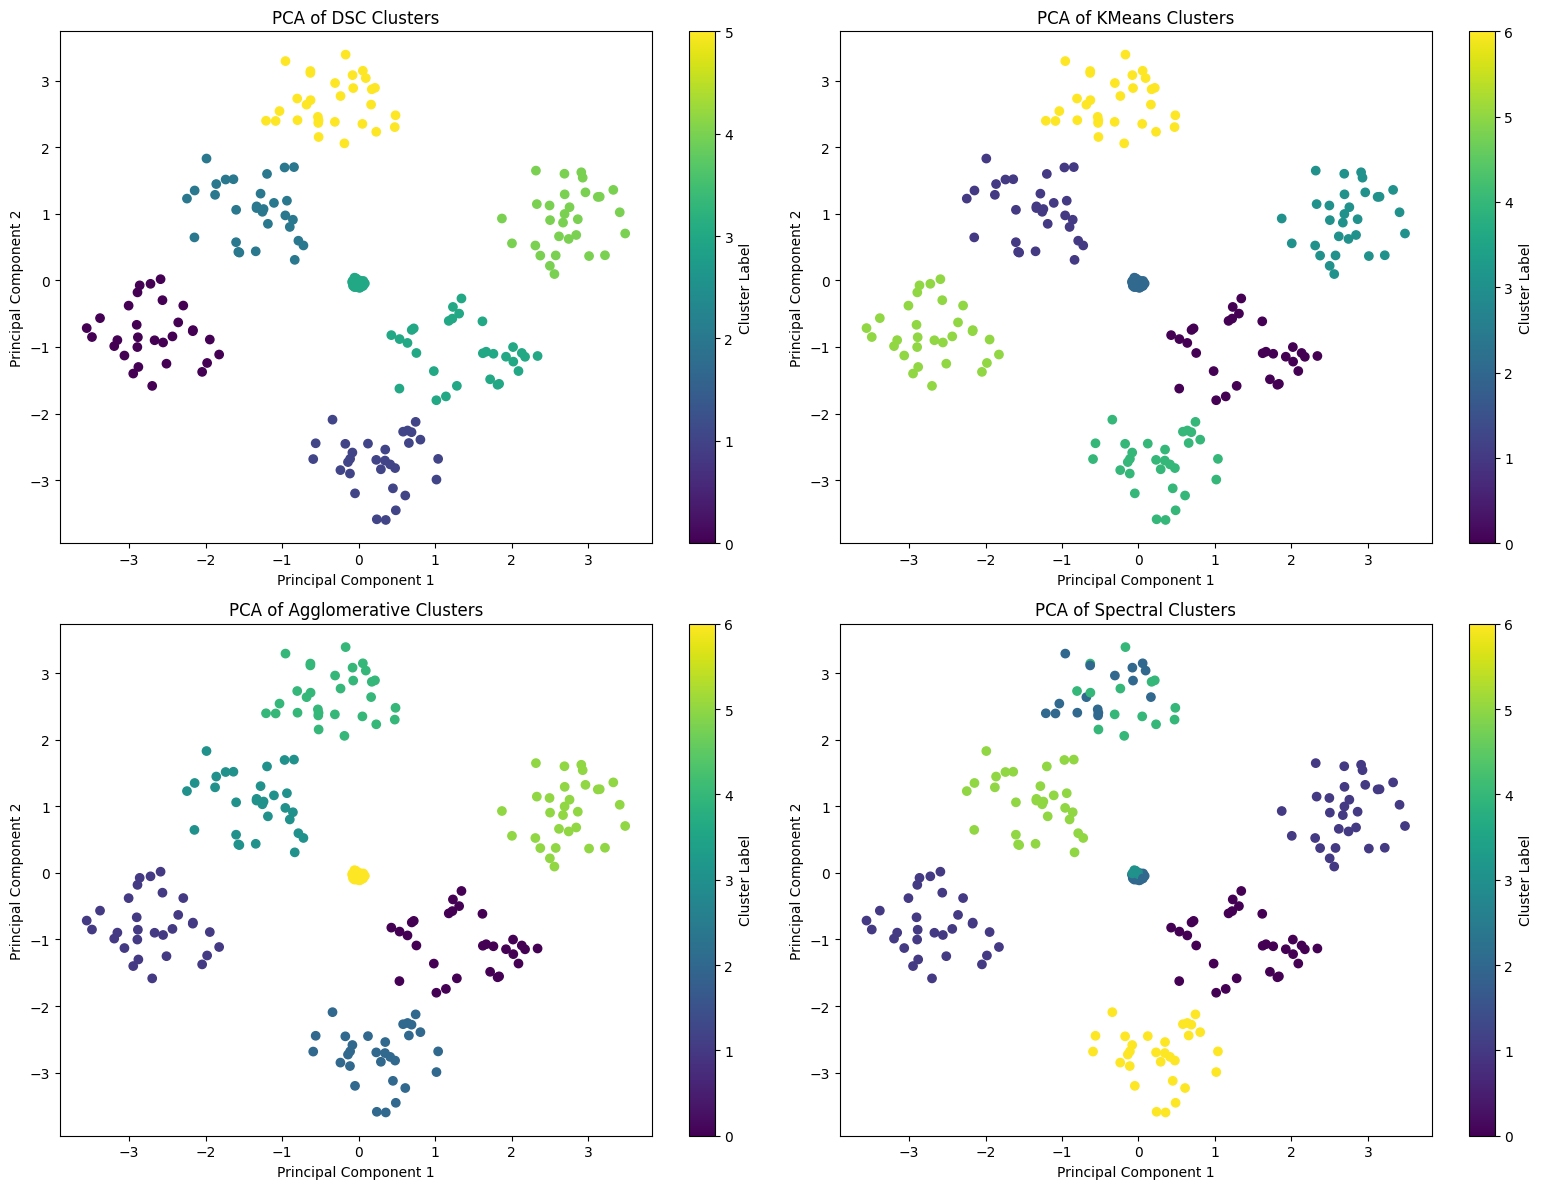

In [47]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plotting the PCA results

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# DSC Clusters
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
axs[0, 0].set_title('PCA of DSC Clusters')
axs[0, 0].set_xlabel('Principal Component 1')
axs[0, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0])
cbar.set_label('Cluster Label')

# KMeans Clusters
axs[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
axs[0, 1].set_title('PCA of KMeans Clusters')
axs[0, 1].set_xlabel('Principal Component 1')
axs[0, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1])
cbar.set_label('Cluster Label')

# Agglomerative Clusters
axs[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative_labels, cmap='viridis')
axs[1, 0].set_title('PCA of Agglomerative Clusters')
axs[1, 0].set_xlabel('Principal Component 1')
axs[1, 0].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0])
cbar.set_label('Cluster Label')

# Spectral Clusters
axs[1, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=spectral_labels, cmap='viridis')
axs[1, 1].set_title('PCA of Spectral Clusters')
axs[1, 1].set_xlabel('Principal Component 1')
axs[1, 1].set_ylabel('Principal Component 2')
cbar = fig.colorbar(axs[1, 1].collections[0], ax=axs[1, 1])
cbar.set_label('Cluster Label')

plt.tight_layout()
plt.show()
